In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv('../data/raw/data.csv') 

df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

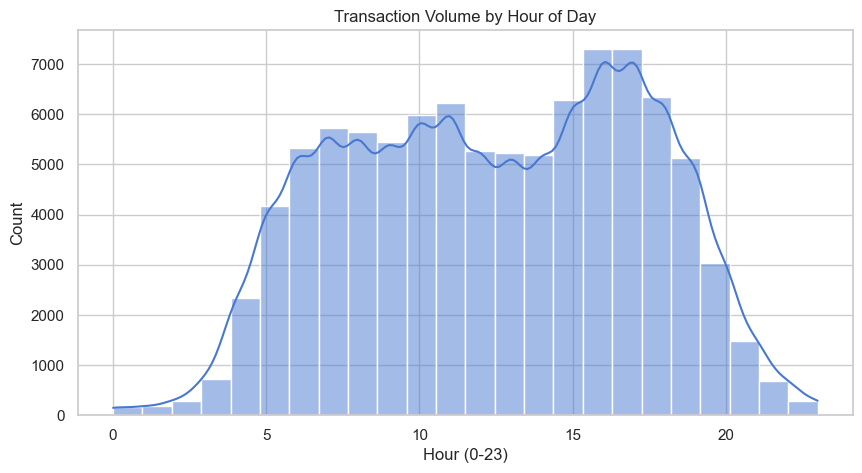

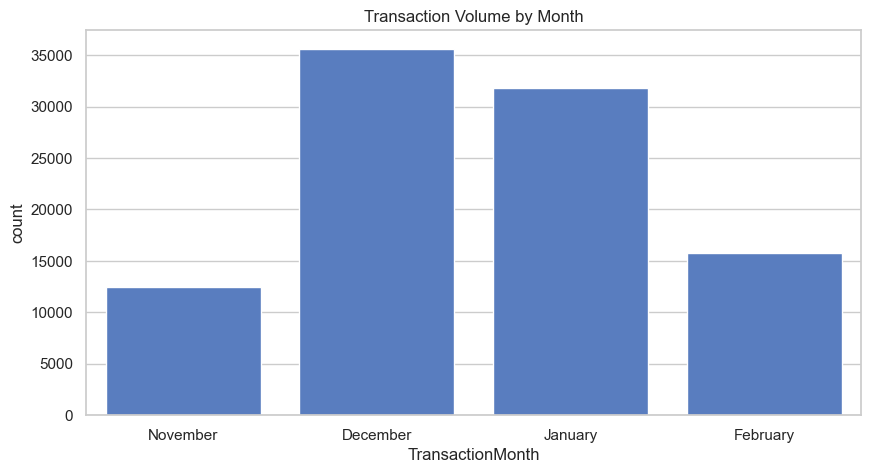

In [8]:
# Extract features
df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionDay'] = df['TransactionStartTime'].dt.day_name()
df['TransactionMonth'] = df['TransactionStartTime'].dt.month_name()

# 1. Transactions by Hour
plt.figure(figsize=(10, 5))
sns.histplot(df['TransactionHour'], bins=24, kde=True)
plt.title('Transaction Volume by Hour of Day')
plt.xlabel('Hour (0-23)')
plt.show()

# 2. Transactions by Month (Seasonality)
plt.figure(figsize=(10, 5))
month_order = ['November', 'December', 'January', 'February'] # Adjust based on your data range
sns.countplot(x='TransactionMonth', data=df) #, order=month_order)
plt.title('Transaction Volume by Month')
plt.show()

,count,mean,median
ProductCategory,,,
financial_services,45405,12734.467570,220.0
airtime,45027,6049.799609,1500.0
utility_bill,1920,20946.692188,11200.0
data_bundles,1613,3714.011159,1000.0
tv,1279,18156.438624,11000.0
ticket,216,96696.759259,80000.0
movies,175,10988.000000,7000.0
transport,25,170240.000000,75000.0
other,2,500.000000,500.0


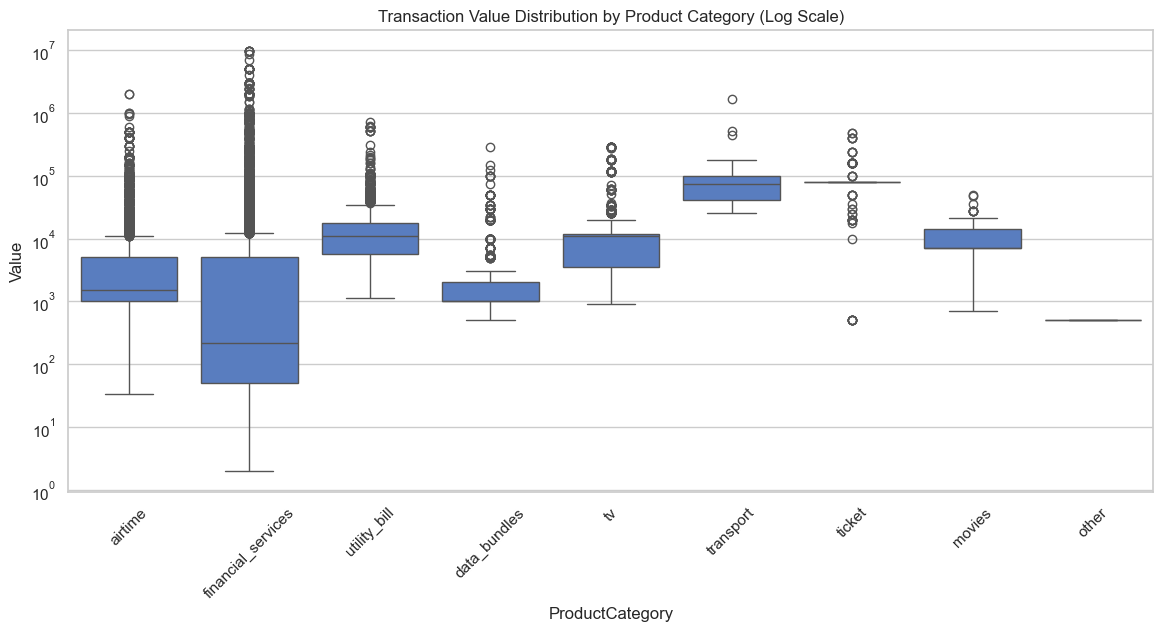

In [9]:
# Calculate average transaction value per category
cat_stats = df.groupby('ProductCategory')['Value'].agg(['count', 'mean', 'median']).sort_values(by='count', ascending=False)
display(cat_stats)

# Visualizing the Value Distribution per Category (Log Scale for visibility)
plt.figure(figsize=(14, 6))
sns.boxplot(x='ProductCategory', y='Value', data=df)
plt.yscale('log') # Log scale is essential because of outliers
plt.xticks(rotation=45)
plt.title('Transaction Value Distribution by Product Category (Log Scale)')
plt.show()

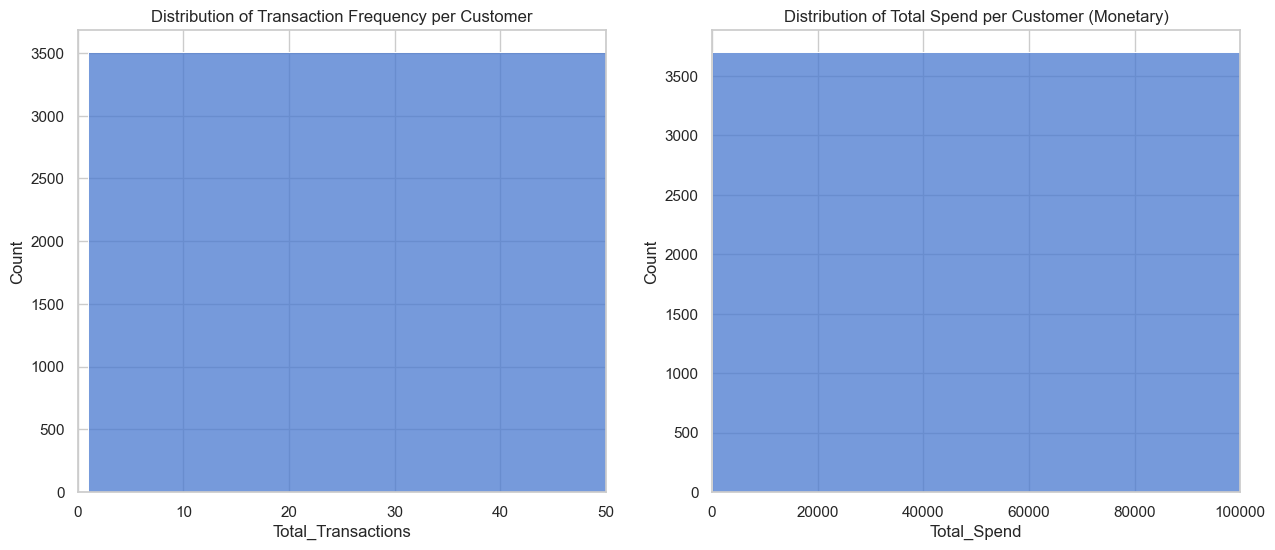

Top 10 High-Value Customers:


,Total_Transactions,Total_Spend,Avg_Transaction_Value,Max_Transaction_Value
CustomerId,,,,
CustomerId_7343,4091,104900000,2.564165e+04,200000
CustomerId_909,115,83480760,7.259197e+05,7000000
CustomerId_1535,7,60212748,8.601821e+06,9880000
CustomerId_4878,205,50912840,2.483553e+05,3000000
CustomerId_5155,121,29763180,2.459767e+05,3000000
CustomerId_4453,54,29296540,5.425285e+05,5000000
CustomerId_2266,77,23780395,3.088363e+05,5000000
CustomerId_2445,55,17746182,3.226579e+05,8600000
CustomerId_2303,11,13126000,1.193273e+06,5000000


In [10]:
# Group by CustomerId
customer_summary = df.groupby('CustomerId').agg({
    'TransactionId': 'count',
    'Value': ['sum', 'mean', 'max']
})
customer_summary.columns = ['Total_Transactions', 'Total_Spend', 'Avg_Transaction_Value', 'Max_Transaction_Value']

# Visualize Customer Activity
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# How many transactions do customers usually make?
sns.histplot(customer_summary['Total_Transactions'], bins=50, ax=ax[0])
ax[0].set_title('Distribution of Transaction Frequency per Customer')
ax[0].set_xlim(0, 50) # Zoom in to see the majority

# How much do they spend in total?
sns.histplot(customer_summary['Total_Spend'], bins=50, ax=ax[1])
ax[1].set_title('Distribution of Total Spend per Customer (Monetary)')
ax[1].set_xlim(0, 100000) # Zoom in

plt.show()

print("Top 10 High-Value Customers:")
display(customer_summary.sort_values(by='Total_Spend', ascending=False).head(10))

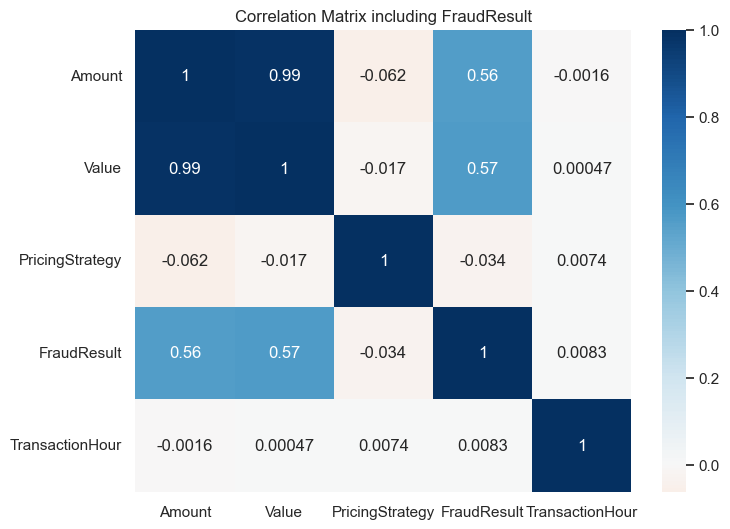

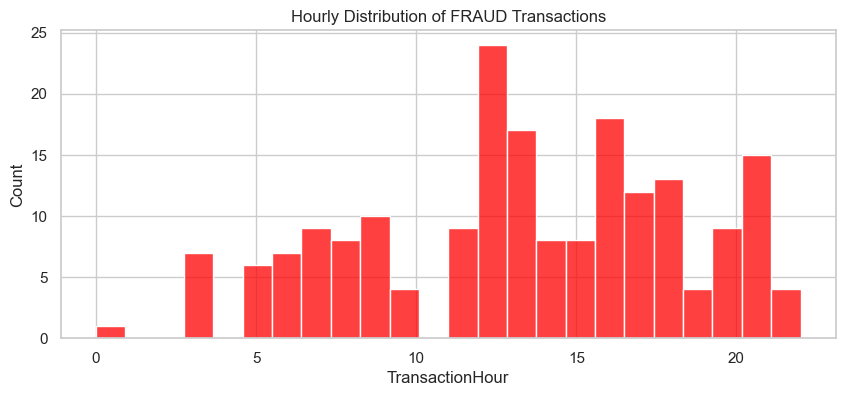

In [11]:
# Correlation Matrix (Numerical only)
numeric_cols = ['Amount', 'Value', 'PricingStrategy', 'FraudResult', 'TransactionHour']
corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='RdBu', center=0)
plt.title('Correlation Matrix including FraudResult')
plt.show()

# Does Fraud happen at specific hours?
fraud_hourly = df[df['FraudResult'] == 1]['TransactionHour']
plt.figure(figsize=(10, 4))
sns.histplot(fraud_hourly, bins=24, color='red')
plt.title('Hourly Distribution of FRAUD Transactions')
plt.show()